In [5]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
words=open('indian_names.txt','r').read().splitlines()
len(words)

6487

In [7]:
chs=sorted(list(set(''.join(words))))
stoi={s:i for i,s in enumerate(chs)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
print(itos)
    

{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [8]:
block_size=3 # context length i.e from how many chars we predict the next one
x,y=[],[] 
for w in words:
    # print(w)
    context=[0]*block_size #initially it has context 3
    for ch in w+'.':
        ix=stoi[ch]
        x.append(context)
        y.append(ix)
        # print(''.join((itos[i]) for i in context),'----->',itos[ix]) #converts the context into the list
        context=context[1:]+[ix] # to remove the first element and add the new element in the last to update the context
x=torch.tensor(x)
y=torch.tensor(y)


In [9]:
x.shape ,x.dtype ,y.shape,y.dtype

(torch.Size([47706, 3]), torch.int64, torch.Size([47706]), torch.int64)

In [10]:
C=torch.randn(27,2).float() #look up table to embed the vector
C

tensor([[ 4.2782e-01, -1.1695e+00],
        [ 1.6132e+00,  5.6800e-02],
        [-4.5336e-01,  5.6203e-01],
        [-1.2075e-01, -2.4399e-01],
        [-1.3451e+00, -1.7844e+00],
        [ 8.9498e-01,  1.5019e+00],
        [ 4.5103e-01, -3.6290e-01],
        [-2.0713e+00, -1.7160e+00],
        [-7.0824e-01, -7.3562e-01],
        [-1.1754e-01,  8.6247e-01],
        [ 1.9329e-01,  3.6491e-01],
        [ 1.1160e+00,  4.6607e-01],
        [-1.8764e-01, -2.7117e-02],
        [-1.0752e+00,  3.8740e-01],
        [ 1.5210e+00, -8.9427e-01],
        [-1.1863e+00,  8.5189e-01],
        [ 1.7652e+00, -2.0069e+00],
        [-1.0450e+00, -6.9795e-01],
        [ 2.0206e-03,  1.0692e-01],
        [-1.5768e+00, -1.5247e-01],
        [-4.5168e-01, -1.8330e-01],
        [-9.2482e-01,  4.6515e-02],
        [-1.0959e+00,  1.0719e+00],
        [-4.1680e-01, -3.3750e-01],
        [ 5.3284e-02, -1.1542e+00],
        [-6.9859e-01, -1.2336e+00],
        [-6.2025e-01,  2.4092e-01]])

In [11]:
C[5]

tensor([0.8950, 1.5019])

In [12]:
C[[5,6,7]] # call with a list of value

tensor([[ 0.8950,  1.5019],
        [ 0.4510, -0.3629],
        [-2.0713, -1.7160]])

In [13]:
C[x] .shape#X as a value passes to C

torch.Size([47706, 3, 2])

In [14]:
# emb=C[x]plt.plot(lri,lossi)

In [15]:
# torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape # its only for fixed block size 3


In [16]:
W1=torch.randn(6,100)
b1=torch.randn(100)

In [17]:
# emb=torch.cat(torch.unbind(emb,1),1).shape # for all block size

In [18]:
emb=C[x]

In [19]:
h=torch.tanh(emb.view(-1,6) @ W1 + b1) # -1 for any value in x like 32
h

tensor([[ 0.2069,  0.8623, -0.9392,  ..., -0.3218,  0.6732, -0.8350],
        [ 0.9930,  0.9372, -0.7933,  ..., -0.7762, -0.4142, -0.8454],
        [ 0.9112,  0.7082,  0.9752,  ..., -0.8093, -1.0000,  0.7939],
        ...,
        [-0.9933, -0.9363, -0.5325,  ..., -0.1319,  0.9992, -0.9210],
        [ 0.0323, -0.3552,  0.6651,  ...,  0.8678,  0.4870, -0.9863],
        [-0.9932, -0.9990,  0.9998,  ...,  0.9251, -1.0000,  0.8550]])

In [20]:
W2=torch.randn(100,27)
b2=torch.randn(27)
logits=h @ W2 + b2 #softmax function
counts=logits.log() #finding fake counts to normalize the values
prob=counts/counts.sum(1,keepdim=True)
#instead of using the 3 lines ,we use cross entropy to find the loss
prob.shape

torch.Size([47706, 27])

In [21]:
y

tensor([1, 1, 2,  ..., 5, 2, 0])

In [22]:
g=torch.Generator().manual_seed(2147483647)
C=torch.randn((27,10),generator =g ,requires_grad=True) # using 10 for 10 neurons 
W1=torch.randn((30,200),generator=g) # there are three unputs for each neuron 
b1=torch.randn((200),generator=g) #using broadcasting to take copy of valiues
W2=torch.randn((200,27),generator=g) #gives a character from 27 characters so we are using 27
b2=torch.randn((27),generator=g)
parameters=[C,W1,b1,W2,b2]

In [23]:
sum(p.nelement() for p in parameters)

11897

In [24]:
for p in parameters:
    p.requires_grad=True

In [25]:
# for _ in range(100):
#     #forward pass
#     emb=C[x]
#    print(''.join((itos[i]) for i in context),'----->',itos[ix])   h=torch.tanh(emb.view(-1,6) @ W1 + b1)
#     logits=h @ W2 + b2
#     loss=F.cross_entropy(logits,y)
#     print(loss.item())
#     #backward pass
#     for p in parameters:
#          p.grad=None
#     loss.backward()
#     #update
#     for p in parameters:
#          p.data+=-0.1*p.grad
# print(loss.item())


In [26]:
torch.randint(0,5,(32,))


tensor([3, 0, 4, 0, 2, 4, 2, 4, 4, 2, 2, 2, 0, 3, 0, 2, 3, 2, 1, 2, 0, 3, 4, 4,
        3, 4, 2, 2, 4, 3, 2, 4])

In [27]:
lre=torch.linspace(-3,0,1000)
lrs=10**lre

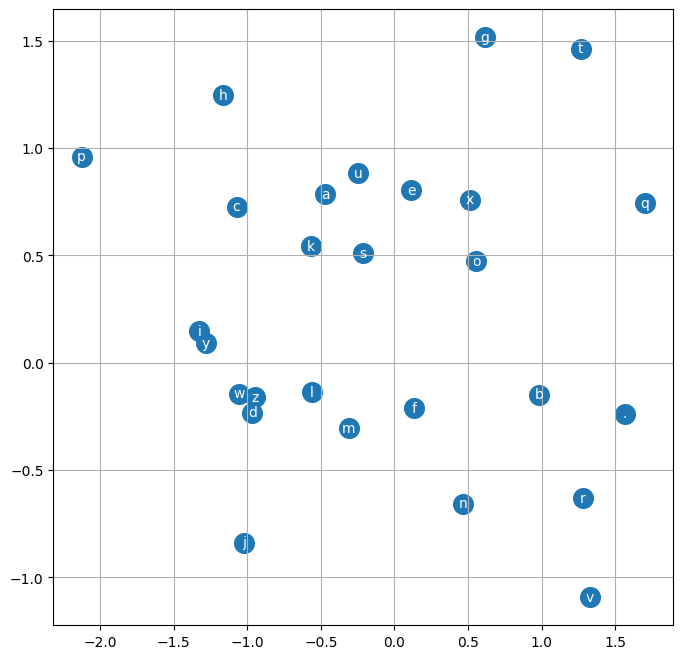

In [28]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [29]:
# plt.plot(lri,lossi)

In [30]:
# to avoid overfiting
# #80% - training split
#10% - dev/validation split
#10% - test split

In [31]:
#creating a dataset
def build_dataset(words): #TO split in three parts
    block_size=3 # context length i.e from how many chars we predict the next one
    x,y=[],[] 
    for w in words:
      #  print(w)
       context=[0]*block_size #initially it has context 3
       for ch in w+'.':
          ix=stoi[ch]
          x.append(context)
          y.append(ix)
        #   print(''.join((itos[i]) for i in context),'----->',itos[ix])   #converts the context into the list
          context=context[1:]+[ix] # to remove the first element and add the new element in the last to update the context
    x=torch.tensor(x)
    y=torch.tensor(y)
    print(x.shape,y.shape)
    return x,y
import random
random.seed(42)
random.shuffle(words) # shuffle all the words in a particular ordergit config --global
n1=int(0.8*len(words)) #0.8 * 32000=28000 (app)
n2=int(0.9*len(words)) #0.9 * 32000=25000
xtr,ytr=build_dataset(words[:n1])
xdev,ydev=build_dataset(words[n1:n2]) #n1-n2
xte,yte=build_dataset(words[n2:])


torch.Size([38242, 3]) torch.Size([38242])
torch.Size([4733, 3]) torch.Size([4733])
torch.Size([4731, 3]) torch.Size([4731])


In [32]:
# using xtr and ytr
lri=[]
lossi=[]
stepi=[]
for i in range(5000):
    ix=torch.randint(0,xtr.shape[0],(32,)) #mini batch constructed
    emb=C[xtr[ix]] #32,3,10 
    h=torch.tanh(emb.view(-1,30) @ W1 + b1) 
    logits=h @ W2 + b2
    loss=F.cross_entropy(logits,ytr[ix])
    #print(loss.item())
    #backward pass
    for p in parameters:
         p.grad=None
    loss.backward()
    #update
    lr=0.01
    for p in parameters:
         p.data+=-lr*p.grad
    # lri.append(lre[i])
    lossi.append(loss.log10().item())
    stepi.append(i)
print(loss.item())

5.015928268432617


In [33]:
ix=torch.randint(0,xdev.shape[0],(32,)) #mini batch constructed
emb=C[xdev[ix]] #32,3,2 
h=torch.tanh(emb.view(-1,30) @ W1 + b1)
logits=h @ W2 + b2
loss=F.cross_entropy(logits,ydev[ix])
loss

tensor(3.6592, grad_fn=<NllLossBackward0>)

In [34]:
ix=torch.randint(0,xte.shape[0],(32,)) #mini batch constructed
emb=C[xte[ix]] #32,3,2 
h=torch.tanh(emb.view(-1,30) @ W1 + b1)
logits=h @ W2 + b2
loss=F.cross_entropy(logits,yte[ix])
loss

tensor(3.7315, grad_fn=<NllLossBackward0>)

In [35]:
xte.shape,yte.shape

(torch.Size([4731, 3]), torch.Size([4731]))

In [36]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(50):
    
    out = []
    context = [0] * block_size #initialize blocksize
    while True:
      emb = C[torch.tensor([context])] 
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

mrtalamnuumi.
bhub.
hayash.
sharshokerar.
radhesh.
tahihe.
pupvwander.
vamenar.
kal.
kowidya.
nashiker.
shima.
sak.
nir.
juinjan.
pucayu.
man.
dima.
shan.
mashima.
shakayan.
haabsakyqhoru.
sak.
lkeuaan.
subbmlhini.
chpardik.
sirm.
opsmprkrinsh.
tahwa.
hua.
rimina.
ire.
sushawakaa.
oodurimita.
sakyqhoru.
tgi.
diiy.
dish.
mee.
rkisbeo.
praksh.
vhrtpatmlaga.
tiga.
ulnsrn.
dhisavynl.
sadashrar.
nifva.
prakawina.
guoa.
saray.
